In [87]:
FIGURE_WIDTH = 8
FIGURE_HEIGHT = 4
LEGEND_FONT_SIZE = 12
LABELS_FONT_SIZE = 18
TICK_FONT_SIZE = 14
TITLE_FONT_SIZE = 18
FONT_WINDOWS = "Times New Roman"
FONT_LINUX = "Nimbus Roman"
FIGURES_PATH = "../paper_figures"

## Figure 1(a) and (b)
- (a) Compares different activation functions
- (b) Difference between ReLU and WSiLU

C:\Users\Vanessa\AppData\Local\Temp\ipykernel_24728\1057203941.py:6: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' not found.
findfont: Font family 'Nimbus Roman' 

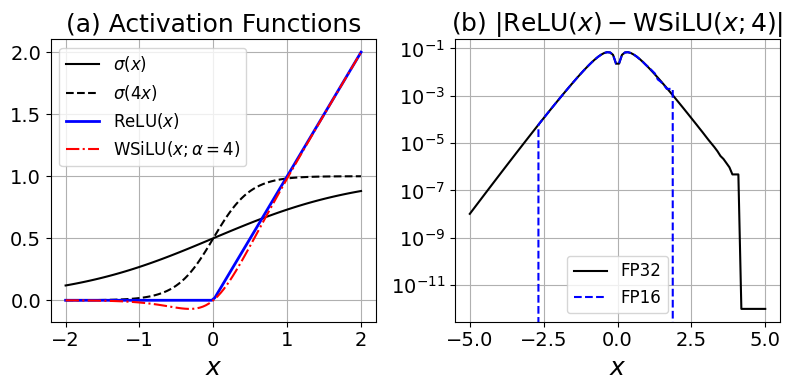

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Definições em NumPy -----
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def relu(x):
    return np.maximum(0.0, x)

def wsilu(x, alpha=4.0):
    return x * sigmoid(alpha * x)

eps = 1e-12  # evita log(0) na segunda figura

plt.figure(figsize=(FIGURE_WIDTH, FIGURE_HEIGHT))
plt.rcParams["font.family"] = FONT_LINUX

# (a) Curvas das ativações
plt.subplot(1, 2, 1)
x = np.linspace(-2, 2, 100, dtype=np.float32)
plt.plot(x, sigmoid(x),           label="$\\sigma(x)$",        color="black")
plt.plot(x, sigmoid(4*x),         label="$\\sigma(4x)$",       color="black", linestyle="--")
plt.plot(x, relu(x),              label="ReLU$(x)$",           linewidth=2, color="blue")
plt.plot(x, wsilu(x, alpha=4.0),  label="WSiLU$(x; \\alpha=4)$", color="red", linestyle="-.")
plt.grid(True)
plt.legend(fontsize=LEGEND_FONT_SIZE)
plt.tick_params(axis='both', labelsize=TICK_FONT_SIZE)  # aumenta os ticks dos eixos
plt.xlabel("$x$", fontsize=LABELS_FONT_SIZE)
plt.title("(a) Activation Functions", fontsize=18)

# (b) Diferença |ReLU - WSiLU| em FP32 e FP16
plt.subplot(1, 2, 2)
x = np.linspace(-5, 5, 100, dtype=np.float32)

# FP32
diff_fp32 = np.abs(relu(x) - wsilu(x, alpha=4.0)) + eps

# FP16: faça o casting do input e dos resultados
x16 = x.astype(np.float16)
relu16 = relu(x16).astype(np.float16)
wsilu16 = wsilu(x16, alpha=4.0).astype(np.float16)
diff_fp16 = np.abs(relu16 - wsilu16).astype(np.float16) + eps

plt.plot(x, diff_fp32, label="FP32", color="black")
plt.plot(x, diff_fp16.astype(np.float32), label="FP16", linestyle="--", color="blue")

plt.yscale('log')
plt.grid(True)
plt.legend(fontsize=LEGEND_FONT_SIZE, loc="lower center")
plt.xlabel("$x$", fontsize=LABELS_FONT_SIZE)
plt.title("(b) $|$ReLU$(x)-$WSiLU$(x;4)|$", fontsize=TITLE_FONT_SIZE)
plt.tick_params(axis='both', labelsize=TICK_FONT_SIZE)  # aumenta os ticks dos eixos

plt.tight_layout()

plt.savefig(FIGURES_PATH + "/activation_func_error.pdf", dpi=1200, bbox_inches="tight")   # formato PNG


plt.show()


## Figure ERROR

In [89]:
import numpy as np
import struct

### LUT 512

In [90]:
def wsilu_lut_512(x):
  lut_hex = [
0x3800, 0x3804, 0x3808, 0x380c, 0x3810, 0x3814, 0x3818, 0x381c, 0x3820, 0x3824, 0x3828, 0x382c, 0x3830, 0x3834, 0x3838, 0x383c, 0x3840, 0x3844, 0x3848, 0x384c, 0x3850, 0x3854, 0x3858, 0x385c, 0x3860, 0x3864, 0x3868, 0x386b, 0x386f, 0x3874, 0x3877, 0x387b, 0x387f, 0x3883, 0x3887, 0x388b, 0x388f, 0x3893, 0x3897, 0x389b, 0x389f, 0x38a2, 0x38a6, 0x38aa, 0x38ae, 0x38b2, 0x38b6, 0x38b9, 0x38be, 0x38c2, 0x38c5, 0x38c9, 0x38cd, 0x38d1, 0x38d5, 0x38d9, 0x38dd, 0x38e0, 0x38e4, 0x38e8, 0x38ec, 0x38ef, 0x38f3, 0x38f7, 0x38fb, 0x38ff, 0x3902, 0x3907, 0x390a, 0x390d, 0x3912, 0x3915, 0x3918, 0x391c, 0x3920, 0x3924, 0x3927, 0x392b, 0x392f, 0x3933, 0x3936, 0x3939, 0x393d, 0x3940, 0x3945, 0x3948, 0x394c, 0x394f, 0x3953, 0x3956, 0x395a, 0x395d, 0x3961, 0x3965, 0x3968, 0x396b, 0x396f, 0x3972, 0x3976, 0x397a, 0x397d, 0x3980, 0x3983, 0x3987, 0x398b, 0x398e, 0x3992, 0x3995, 0x3998, 0x399b, 0x399e, 0x39a2, 0x39a5, 0x39a8, 0x39ac, 0x39af, 0x39b2, 0x39b6, 0x39ba, 0x39bd, 0x39c0, 0x39c3, 0x39c6, 0x39c9, 0x39cc, 0x39cf, 0x39d3, 0x39d6, 0x39d9, 0x39dc, 0x39df, 0x39e3, 0x39e6, 0x39e9, 0x39eb, 0x39ef, 0x39f2, 0x39f5, 0x39f9, 0x39fb, 0x39fe, 0x3a02, 0x3a04, 0x3a07, 0x3a0b, 0x3a0d, 0x3a10, 0x3a13, 0x3a16, 0x3a18, 0x3a1c, 0x3a1e, 0x3a22, 0x3a24, 0x3a26, 0x3a2a, 0x3a2c, 0x3a30, 0x3a32, 0x3a35, 0x3a37, 0x3a3b, 0x3a3d, 0x3a41, 0x3a43, 0x3a46, 0x3a48, 0x3a4b, 0x3a4d, 0x3a50, 0x3a53, 0x3a56, 0x3a58, 0x3a5b, 0x3a5d, 0x3a60, 0x3a63, 0x3a65, 0x3a68, 0x3a6a, 0x3a6d, 0x3a6f, 0x3a72, 0x3a75, 0x3a77, 0x3a7a, 0x3a7b, 0x3a7e, 0x3a80, 0x3a83, 0x3a86, 0x3a88, 0x3a8b, 0x3a8c, 0x3a8f, 0x3a92, 0x3a93, 0x3a96, 0x3a99, 0x3a9b, 0x3a9d, 0x3a9f, 0x3aa2, 0x3aa3, 0x3aa6, 0x3aa9, 0x3aaa, 0x3aad, 0x3aaf, 0x3ab1, 0x3ab4, 0x3ab6, 0x3ab8, 0x3aba, 0x3abd, 0x3abe, 0x3ac1, 0x3ac2, 0x3ac5, 0x3ac7, 0x3ac8, 0x3acb, 0x3acc, 0x3acf, 0x3ad1, 0x3ad4, 0x3ad5, 0x3ad7, 0x3ad9, 0x3adb, 0x3adc, 0x3adf, 0x3ae1, 0x3ae2, 0x3ae4, 0x3ae7, 0x3ae8, 0x3aea, 0x3aeb, 0x3aee, 0x3af0, 0x3af1, 0x3af3, 0x3af6, 0x3af7, 0x3af9, 0x3afa, 0x3afc, 0x3afd, 0x3b00, 0x3b02, 0x3b04, 0x3b05, 0x3b07, 0x3b08, 0x3b0a, 0x3b0b, 0x3b10, 0x3b13, 0x3b16, 0x3b19, 0x3b1c, 0x3b20, 0x3b23, 0x3b26, 0x3b29, 0x3b2b, 0x3b2e, 0x3b31, 0x3b34, 0x3b38, 0x3b39, 0x3b3d, 0x3b40, 0x3b42, 0x3b45, 0x3b48, 0x3b4a, 0x3b4d, 0x3b4f, 0x3b52, 0x3b54, 0x3b57, 0x3b59, 0x3b5b, 0x3b5e, 0x3b60, 0x3b63, 0x3b65, 0x3b66, 0x3b68, 0x3b6c, 0x3b6d, 0x3b6f, 0x3b71, 0x3b74, 0x3b76, 0x3b78, 0x3b79, 0x3b7b, 0x3b7d, 0x3b7f, 0x3b80, 0x3b84, 0x3b86, 0x3b88, 0x3b89, 0x3b8b, 0x3b8b, 0x3b8d, 0x3b8f, 0x3b90, 0x3b92, 0x3b94, 0x3b96, 0x3b98, 0x3b99, 0x3b9b, 0x3b9b, 0x3b9d, 0x3b9f, 0x3ba1, 0x3ba2, 0x3ba2, 0x3ba4, 0x3ba6, 0x3ba8, 0x3ba8, 0x3baa, 0x3bac, 0x3bac, 0x3bad, 0x3baf, 0x3baf, 0x3bb1, 0x3bb3, 0x3bb3, 0x3bb5, 0x3bb7, 0x3bb7, 0x3bb9, 0x3bb9, 0x3bba, 0x3bba, 0x3bbc, 0x3bbe, 0x3bbe, 0x3bc0, 0x3bc0, 0x3bc2, 0x3bc2, 0x3bc4, 0x3bc4, 0x3bc6, 0x3bc6, 0x3bc6, 0x3bc8, 0x3bc8, 0x3bc9, 0x3bc9, 0x3bcb, 0x3bcb, 0x3bcd, 0x3bcd, 0x3bcd, 0x3bcf, 0x3bcf, 0x3bd1, 0x3bd1, 0x3bd1, 0x3bd3, 0x3bd3, 0x3bd3, 0x3bd5, 0x3bd5, 0x3bd5, 0x3bd7, 0x3bd7, 0x3bd7, 0x3bd9, 0x3bd9, 0x3bd9, 0x3bdb, 0x3bdb, 0x3bdb, 0x3bdd, 0x3bdd, 0x3bdf, 0x3bdf, 0x3be0, 0x3be0, 0x3be2, 0x3be2, 0x3be4, 0x3be4, 0x3be6, 0x3be6, 0x3be8, 0x3be8, 0x3be8, 0x3bea, 0x3bea, 0x3bea, 0x3bec, 0x3bec, 0x3bec, 0x3bee, 0x3bee, 0x3bee, 0x3bee, 0x3bf0, 0x3bf0, 0x3bf0, 0x3bf0, 0x3bf2, 0x3bf2, 0x3bf2, 0x3bf2, 0x3bf4, 0x3bf4, 0x3bf4, 0x3bf4, 0x3bf4, 0x3bf4, 0x3bf6, 0x3bf6, 0x3bf6, 0x3bf6, 0x3bf6, 0x3bf6, 0x3bf8, 0x3bf8, 0x3bf8, 0x3bf8, 0x3bf8, 0x3bf8, 0x3bf8, 0x3bf8, 0x3bfa, 0x3bfa, 0x3bfa, 0x3bfa, 0x3bfa, 0x3bfa, 0x3bfa, 0x3bfa, 0x3bfa, 0x3bfa, 0x3bfa, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3c00, 0x3c00, 0x3c00, 0x3c00, 0x3c00, 0x3c00, 0x3c00, 0x3c00, 0x3c00, 0x3c00, 0x3c00, 0x3c00]
  lut_float16 = np.array([struct.unpack('>e', struct.pack('>H', v))[0] for v in lut_hex], dtype=np.float16)

  # --- Constantes do VHDL ---
  LIMIT_1= np.float16(0.5)
  LIMIT_2= np.float16(1.0)
  LIMIT_3= np.float16(1.5)
  LIMIT_4= np.float16(2.0)
  N_1 = 128 *2
  N_2= 64*2
  N_3= 32*2
  N_4= 32*2
  LUT_SIZE = len(lut_float16)

  x_q = np.float16(x)
  abs_x = np.abs(x_q)
  if(x < np.float16(-2.0)):
    y_sigmoid = np.float16(0)
  else:

    if abs_x <= LIMIT_1:
        scaled = int((abs_x / LIMIT_1) * N_1)
    elif abs_x <= LIMIT_2:
        scaled = N_1 + int(((abs_x - LIMIT_1) / (LIMIT_2 - LIMIT_1)) * N_2)
    elif abs_x <= LIMIT_3:
        scaled = N_1 + N_2 + int(((abs_x - LIMIT_2) / (LIMIT_3 - LIMIT_2)) * N_3)
    elif abs_x <= LIMIT_4:
        scaled = N_1 + N_2 + N_3 + int(((abs_x - LIMIT_3) / (LIMIT_4 - LIMIT_3)) * N_4)
    else:
        scaled = LUT_SIZE - 1

    idx = max(0, min(LUT_SIZE - 1, scaled))
    sigmoid_val = lut_float16[idx]

      # Aplica a simetria para valores negativos de x
    if x_q < 0:
        y_sigmoid = np.float16(1.0) - sigmoid_val
    else:
        y_sigmoid = sigmoid_val

  return x_q * y_sigmoid


### LUT 256

In [91]:
def wsilu_lut_256(x):
  lut_hex = [
0x3800, 0x3808, 0x3810, 0x3818, 0x3820, 0x3828, 0x3830, 0x3838, 0x3840, 0x3848, 0x3850, 0x3858, 0x3860, 0x3868, 0x386f, 0x3877, 0x387f, 0x3887, 0x388f, 0x3897, 0x389f, 0x38a6, 0x38ae, 0x38b6, 0x38be, 0x38c5, 0x38cd, 0x38d5, 0x38dd, 0x38e4, 0x38ec, 0x38f3, 0x38fb, 0x3902, 0x390a, 0x3912, 0x3918, 0x3920, 0x3927, 0x392f, 0x3936, 0x393d, 0x3945, 0x394c, 0x3953, 0x395a, 0x3961, 0x3968, 0x396f, 0x3976, 0x397d, 0x3983, 0x398b, 0x3992, 0x3998, 0x399e, 0x39a5, 0x39ac, 0x39b2, 0x39ba, 0x39c0, 0x39c6, 0x39cc, 0x39d3, 0x39d9, 0x39df, 0x39e6, 0x39eb, 0x39f2, 0x39f9, 0x39fe, 0x3a04, 0x3a0b, 0x3a10, 0x3a16, 0x3a1c, 0x3a22, 0x3a26, 0x3a2c, 0x3a32, 0x3a37, 0x3a3d, 0x3a43, 0x3a48, 0x3a4d, 0x3a53, 0x3a58, 0x3a5d, 0x3a63, 0x3a68, 0x3a6d, 0x3a72, 0x3a77, 0x3a7b, 0x3a80, 0x3a86, 0x3a8b, 0x3a8f, 0x3a93, 0x3a99, 0x3a9d, 0x3aa2, 0x3aa6, 0x3aaa, 0x3aaf, 0x3ab4, 0x3ab8, 0x3abd, 0x3ac1, 0x3ac5, 0x3ac8, 0x3acc, 0x3ad1, 0x3ad5, 0x3ad9, 0x3adc, 0x3ae1, 0x3ae4, 0x3ae8, 0x3aeb, 0x3af0, 0x3af3, 0x3af7, 0x3afa, 0x3afd, 0x3b02, 0x3b05, 0x3b08, 0x3b0b, 0x3b13, 0x3b19, 0x3b20, 0x3b26, 0x3b2b, 0x3b31, 0x3b38, 0x3b3d, 0x3b42, 0x3b48, 0x3b4d, 0x3b52, 0x3b57, 0x3b5b, 0x3b60, 0x3b65, 0x3b68, 0x3b6d, 0x3b71, 0x3b76, 0x3b79, 0x3b7d, 0x3b80, 0x3b86, 0x3b89, 0x3b8b, 0x3b8f, 0x3b92, 0x3b96, 0x3b99, 0x3b9b, 0x3b9f, 0x3ba2, 0x3ba4, 0x3ba8, 0x3baa, 0x3bac, 0x3baf, 0x3bb1, 0x3bb3, 0x3bb7, 0x3bb9, 0x3bba, 0x3bbc, 0x3bbe, 0x3bc0, 0x3bc2, 0x3bc4, 0x3bc6, 0x3bc8, 0x3bc9, 0x3bcb, 0x3bcd, 0x3bcd, 0x3bcf, 0x3bd1, 0x3bd3, 0x3bd3, 0x3bd5, 0x3bd7, 0x3bd7, 0x3bd9, 0x3bdb, 0x3bdb, 0x3bdd, 0x3bdf, 0x3be0, 0x3be2, 0x3be4, 0x3be6, 0x3be8, 0x3bea, 0x3bea, 0x3bec, 0x3bee, 0x3bee, 0x3bf0, 0x3bf0, 0x3bf2, 0x3bf2, 0x3bf4, 0x3bf4, 0x3bf4, 0x3bf6, 0x3bf6, 0x3bf6, 0x3bf8, 0x3bf8, 0x3bf8, 0x3bf8, 0x3bfa, 0x3bfa, 0x3bfa, 0x3bfa, 0x3bfa, 0x3bfa, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfc, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3bfe, 0x3c00, 0x3c00, 0x3c00, 0x3c00, 0x3c00, 0x3c00]
  lut_float16 = np.array([struct.unpack('>e', struct.pack('>H', v))[0] for v in lut_hex], dtype=np.float16)

  # --- Constantes do VHDL ---
  LIMIT_1= np.float16(0.5)
  LIMIT_2= np.float16(1.0)
  LIMIT_3= np.float16(1.5)
  LIMIT_4= np.float16(2.0)
  N_1 = 128
  N_2= 64
  N_3= 32
  N_4= 32
  LUT_SIZE = len(lut_float16)

  x_q = np.float16(x)
  abs_x = np.abs(x_q)
  if(x < np.float16(-2.0)):
    y_sigmoid = np.float16(0)
  else:

    if abs_x <= LIMIT_1:
        scaled = int((abs_x / LIMIT_1) * N_1)
    elif abs_x <= LIMIT_2:
        scaled = N_1 + int(((abs_x - LIMIT_1) / (LIMIT_2 - LIMIT_1)) * N_2)
    elif abs_x <= LIMIT_3:
        scaled = N_1 + N_2 + int(((abs_x - LIMIT_2) / (LIMIT_3 - LIMIT_2)) * N_3)
    elif abs_x <= LIMIT_4:
        scaled = N_1 + N_2 + N_3 + int(((abs_x - LIMIT_3) / (LIMIT_4 - LIMIT_3)) * N_4)
    else:
        scaled = LUT_SIZE - 1

    idx = max(0, min(LUT_SIZE - 1, scaled))
    sigmoid_val = lut_float16[idx]

      # Aplica a simetria para valores negativos de x
    if x_q < 0:
        y_sigmoid = np.float16(1.0) - sigmoid_val
    else:
        y_sigmoid = sigmoid_val

  return x_q * y_sigmoid

  

### Poly

In [92]:


def WSiLU_polinomial_float16_escalar(x):
    """
    Função original adaptada para float16.
    Aceita um único valor (escalar) e retorna um float16.
    """
    # Converte a entrada e todas as constantes para float16
    x = np.float16(x)
    
    # Estrutura if/elif/else otimizada
    if x < np.float16(-2.0):
        return np.float16(0.0)
    elif x < np.float16(-1.5):
        # return -0.00947*x**2 - 0.03897*x - 0.04077
        return np.float16(-0.00947) * x**2 - np.float16(0.03897) * x - np.float16(0.04077)
    elif x < np.float16(-1.0):
        # return -0.03964*x**2 - 0.12683*x - 0.10498
        return np.float16(-0.03964) * x**2 - np.float16(0.12683) * x - np.float16(0.10498)
    elif x < np.float16(-0.75):
        # return -0.07245*x**2 - 0.19702*x - 0.14258
        return np.float16(-0.07245) * x**2 - np.float16(0.19702) * x - np.float16(0.14258)
    elif x < np.float16(-0.5):
        # return -0.01180*x**2 - 0.11218*x - 0.11292
        return np.float16(-0.0118) * x**2 - np.float16(0.11218) * x - np.float16(0.11292)
    elif x < np.float16(-0.25):
        # return 0.31836*x**2 + 0.20410*x - 0.03668
        return np.float16(0.31836) * x**2 + np.float16(0.2041) * x - np.float16(0.03668)
    elif x < np.float16(0.0):
        # return 0.87061*x**2 + 0.48315*x - 0.00039
        return np.float16(0.87061) * x**2 + np.float16(0.48315) * x - np.float16(0.00039)
    elif x < np.float16(0.25):
        # return 0.87061*x**2 + 0.51709*x - 0.00039
        return np.float16(0.87061) * x**2 + np.float16(0.51709) * x - np.float16(0.00039)
    elif x < np.float16(0.5):
        # return 0.31787*x**2 + 0.79639*x - 0.03674
        return np.float16(0.31787) * x**2 + np.float16(0.79639) * x - np.float16(0.03674)
    elif x < np.float16(0.75):
        # return -0.01367*x**2 + 1.11426*x - 0.11359
        return np.float16(-0.01367) * x**2 + np.float16(1.11426) * x - np.float16(0.11359)
    elif x < np.float16(1.0):
        # return -0.07178*x**2 + 1.19531*x - 0.14172
        return np.float16(-0.07178) * x**2 + np.float16(1.19531) * x - np.float16(0.14172)
    elif x < np.float16(1.25):
        # return -0.07483*x**2 + 1.20508*x - 0.14819
        return np.float16(-0.07483) * x**2 + np.float16(1.20508) * x - np.float16(0.14819)
    elif x < np.float16(1.312):
        # return 0.27051*x**2 + 0.33130*x + 0.40454
        return np.float16(0.27051) * x**2 + np.float16(0.3313) * x + np.float16(0.40454)
    elif x < np.float16(1.375):
        # return 0.26294*x**2 + 0.33179*x + 0.41650
        return np.float16(0.26294) * x**2 + np.float16(0.33179) * x + np.float16(0.4165)
    elif x < np.float16(1.438):
        # return 0.24866*x**2 + 0.33203*x + 0.44238
        return np.float16(0.24866) * x**2 + np.float16(0.33203) * x + np.float16(0.44238)
    elif x < np.float16(1.5):
        # return 0.22717*x**2 + 0.33252*x + 0.48633
        return np.float16(0.22717) * x**2 + np.float16(0.33252) * x + np.float16(0.48633)
    elif x < np.float16(2.0):
        # return 0.01075*x**2 + 0.96826*x + 0.02046
        return np.float16(0.01075) * x**2 + np.float16(0.96826) * x + np.float16(0.02046)
    else:
        return x

### Gráfico

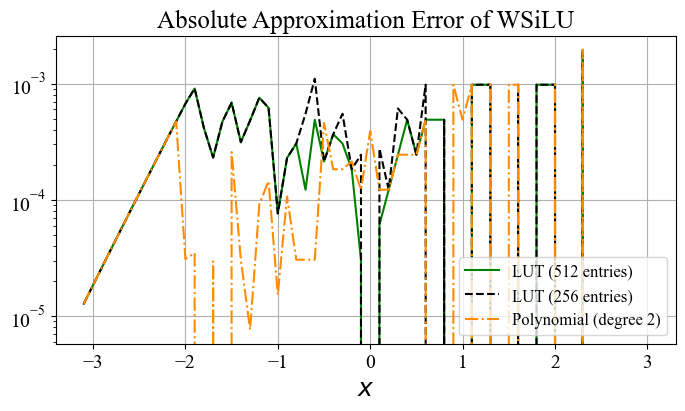

In [93]:
def wsilu_real(x, w=4.0):
    return np.float16(x / (1.0 + np.exp(-4 * x)))
# --- Data Generation ---
xs_sim = np.arange(-3.1, 3.1, 0.1)
ys_real_at_sim_points = wsilu_real(xs_sim)

# --- Error Calculation for LUT 256 ---
ys_sim_256 = np.array([wsilu_lut_256(val) for val in xs_sim])
error_256 = ys_real_at_sim_points - ys_sim_256

# --- Error Calculation for LUT 512 ---
ys_sim_512 = np.array([wsilu_lut_512(val) for val in xs_sim])
error_512 = ys_real_at_sim_points - ys_sim_512

# --- Error Calculation for Poly ---
ys_sim_poly = np.array([WSiLU_polinomial_float16_escalar(val) for val in xs_sim])
error_poly = ys_real_at_sim_points - ys_sim_poly

plt.figure(figsize=(FIGURE_WIDTH, FIGURE_HEIGHT))
plt.rcParams["font.family"] = FONT_WINDOWS
plt.plot(xs_sim, abs(error_512), label="LUT (512 entries)", color="green", linestyle="-")
plt.plot(xs_sim, abs(error_256), label="LUT (256 entries)", color="black", linestyle="--")
plt.plot(xs_sim, abs(error_poly), label="Polynomial (degree 2)", color="darkorange", linestyle="-.")

plt.grid(True)
plt.legend(fontsize=LEGEND_FONT_SIZE, loc="best")
plt.tick_params(axis='both', labelsize=TICK_FONT_SIZE) 
plt.xlabel("$x$", fontsize=LABELS_FONT_SIZE)
plt.title("Absolute Approximation Error of WSiLU", fontsize=TITLE_FONT_SIZE)
plt.yscale('log')
plt.savefig(FIGURES_PATH + "/aprox_error.pdf", dpi=1200, bbox_inches="tight") 
plt.show()